# Early Stage Diabetes Risk Prediction

![Diabetes](https://i.postimg.cc/RZGrZyk2/DIABETES.jpg)

Diabetes is a chronic condition that affects millions of people worldwide. 
Early detection can significantly improve the quality of life and reduce the risk of severe complications. In this notebook, we will explore a dataset that contains various symptoms and demographic information to predict the risk of early-stage diabetes.


## Input Data

### Dataset Overview
This project uses the **Early Stage Diabetes Risk Prediction Dataset**, which includes information about the signs and symptoms of newly diagnosed diabetic patients or those at risk of developing diabetes. The data is collected through direct questionnaires from patients at the **Sylhet Diabetes Hospital** in Sylhet, Bangladesh, and has been approved by a doctor for research purposes.

- **Last Updated**: 4 years ago (Version 1)

### Dataset Information
The dataset consists of various attributes that represent common symptoms and patient information that can help identify individuals at risk for early-stage diabetes. The data has been specifically gathered to predict the likelihood of diabetes using machine learning techniques.

### Attribute Information
The dataset contains the following attributes:

- **Age**: The patient's age (range: 1.20 to 65 years).
- **Sex**: Gender of the patient (1 = Male, 2 = Female).
- **Polyuria**: Whether the patient experiences excessive urination (1 = Yes, 2 = No).
- **Polydipsia**: Whether the patient experiences excessive thirst (1 = Yes, 2 = No).
- **Sudden Weight Loss**: Whether the patient has experienced sudden weight loss (1 = Yes, 2 = No).
- **Weakness**: Whether the patient feels weakness (1 = Yes, 2 = No).
- **Polyphagia**: Whether the patient experiences excessive hunger (1 = Yes, 2 = No).
- **Genital Thrush**: Whether the patient has genital thrush (1 = Yes, 2 = No).
- **Visual Blurring**: Whether the patient experiences blurred vision (1 = Yes, 2 = No).
- **Itching**: Whether the patient experiences itching (1 = Yes, 2 = No).
- **Irritability**: Whether the patient feels irritable (1 = Yes, 2 = No).
- **Delayed Healing**: Whether the patient experiences delayed healing (1 = Yes, 2 = No).
- **Partial Paresis**: Whether the patient has partial paralysis (1 = Yes, 2 = No).
- **Muscle Stiffness**: Whether the patient experiences muscle stiffness (1 = Yes, 2 = No).
- **Alopecia**: Whether the patient has alopecia (1 = Yes, 2 = No).
- **Obesity**: Whether the patient is obese (1 = Yes, 2 = No).
- **Class**: The diabetes diagnosis result (1 = Positive, 2 = Negative).

These attributes are essential for training machine learning models to predict early-stage diabetes.

### Relevant Papers
- **Title**: Likelihood Prediction of Diabetes at Early Stage Using Data Mining Techniques
  - **Authors**: M. M. Faniqul Islam, Rahatara Ferdousi, Sadikur Rahman, Humayra Yasmin Bushra
  - **Citation**: Islam, MM Faniqul, et al. 'Likelihood prediction of diabetes at early stage using data mining techniques.' *Computer Vision and Machine Intelligence in Medical Image Analysis*. Springer, Singapore, 2020, 113-125.

## Table of Contents

- [Importing Libraries](#importing-libraries)
- [Loading Data](#loading-data)
- [Data Overview to understand its structure](#Data-Overview-to-understand-its-structure)
- [Data Preprocessing](#data-preprocessing)
- [Modeling](#modeling)
- [Results](#results)


## Importing Libraries

In [4]:
# Import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Loading Data

In [6]:
file_path = r"C:\Users\LENOVO\Documents\DS_AI_ML_Projects\diabetes_dataset.csv"
df = pd.read_csv(file_path)

## Data Overview to understand its structure.

In [7]:
# Display the first few rows of the dataset
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## Data Preprocessing
We need to preprocess the data before we can perform any analysis or build a predictive model. This includes handling categorical variables and checking for missing values.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [9]:
df.shape

(520, 17)

In [10]:
df["class"].unique()

array(['Positive', 'Negative'], dtype=object)

In [11]:
# displaying the number of Positive instances
print(len(df[df["class"] == "Positive"]))

320


In [12]:
# displaying the number of Negative instances
print(len(df[df["class"] == "Negative"]))

200


In [13]:
# Check for missing values
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

Fortunately, there are no missing values in the dataset. Next, we will encode the categorical variables.

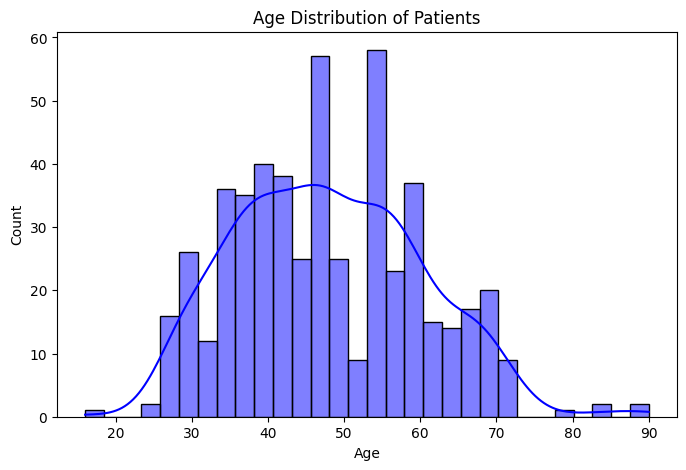

In [14]:
##Age Distribution

plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

The histogram above shows the age distribution of patients in the dataset, helping us understand the demographics.


Exploratory Data Analysis to find interesting patterns and relationships between the features.

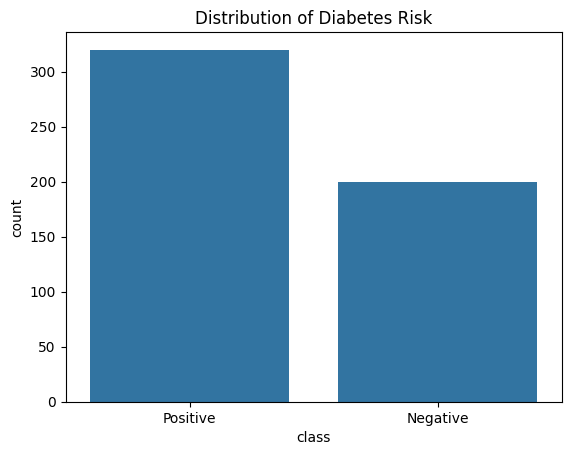

In [15]:
# Plot the distribution of the target variable
sns.countplot(x="class", data=df)
plt.title("Distribution of Diabetes Risk")
plt.show()

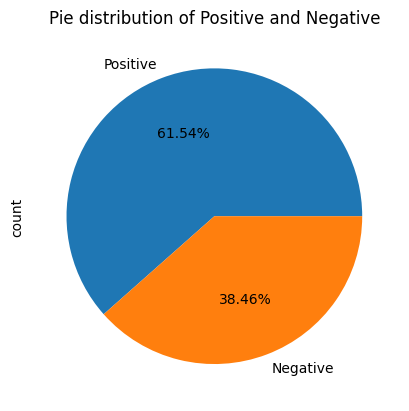

In [16]:
labels = ["Positive", "Negative"]
df["class"].value_counts().plot(kind = "pie", autopct = "%1.2f%%", labels = labels)
plt.title("Pie distribution of Positive and Negative")
plt.show()

Encoding categorical variables to Improve Model Performance, Avoiding Misinterpretation and Enhancing Generalization

In [17]:
# Encode categorical variables
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = label_encoder.fit_transform(df[column])

**BUIDING MODEL**
## splitting data into x and y
Build a predictive model to determine the risk of early-stage diabetes. We will use a Random Forest Classifier for this task.

In [18]:
# Split the data into training and testing sets
X = df.drop("class", axis=1)
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [20]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [21]:
print(X.shape) 
print(y.shape)

(520, 16)
(520,)


In [22]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Make predictions on the test set
y_pred = model.predict(X_test)

## Model Evaluation

In [24]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(0.9903846153846154,
 array([[33,  0],
        [ 1, 70]]),
 '              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99        33\n           1       1.00      0.99      0.99        71\n\n    accuracy                           0.99       104\n   macro avg       0.99      0.99      0.99       104\nweighted avg       0.99      0.99      0.99       104\n')

## Results

In [27]:
# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)  # Convert to dictionary

# Convert classification report to DataFrame
class_report_df = pd.DataFrame(class_report).transpose()

# Create a summary DataFrame for all metrics
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy"],
    "Value": [accuracy]
})

# Display DataFrames
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report_df)
print("\nMetrics Summary:\n", metrics_df)

Confusion Matrix:
 [[33  0]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score     support
0              0.970588  1.000000  0.985075   33.000000
1              1.000000  0.985915  0.992908   71.000000
accuracy       0.990385  0.990385  0.990385    0.990385
macro avg      0.985294  0.992958  0.988991  104.000000
weighted avg   0.990667  0.990385  0.990422  104.000000

Metrics Summary:
      Metric     Value
0  Accuracy  0.990385


1. Confusion Matrix Heatmap to visualize how well the model predicted each class.

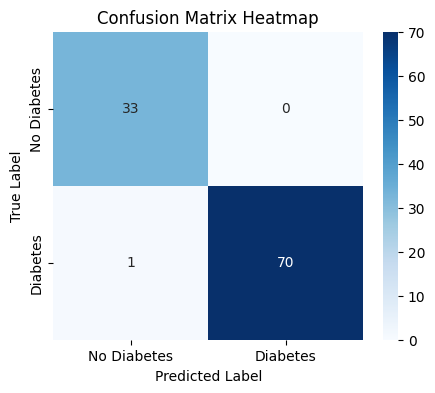

In [28]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

 Interpretation:

Darker blue means more correctly classified cases.
If FP or FN values are high, the model may need improvement.

2. Classification Report as a Bar Chart to Visualize precision, recall, and F1-score can help compare performance across classes.

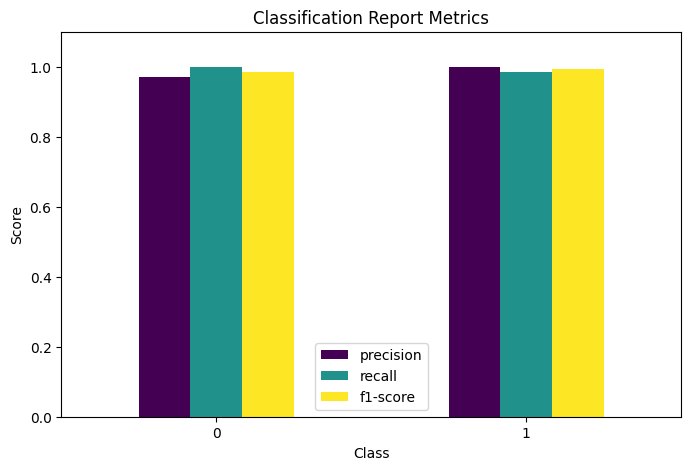

In [29]:
# Convert classification report to DataFrame
class_report = classification_report(y_test, y_pred, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose().iloc[:-3, :]  # Exclude accuracy/macro/weighted avg

# Plot precision, recall, and F1-score
class_report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(8, 5), colormap='viridis')
plt.title('Classification Report Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim(0, 1.1)  # Set y-axis range for better readability
plt.xticks(rotation=0)
plt.show()

Interpretation:
Bars close to 1.0 mean the model performed perfectly (which could indicate overfitting).
If bars are imbalanced, it suggests one class is harder to predict than the other.

3. Class Distribution (Before and After Prediction) to check if the model maintains the correct proportion of positive and negative cases.

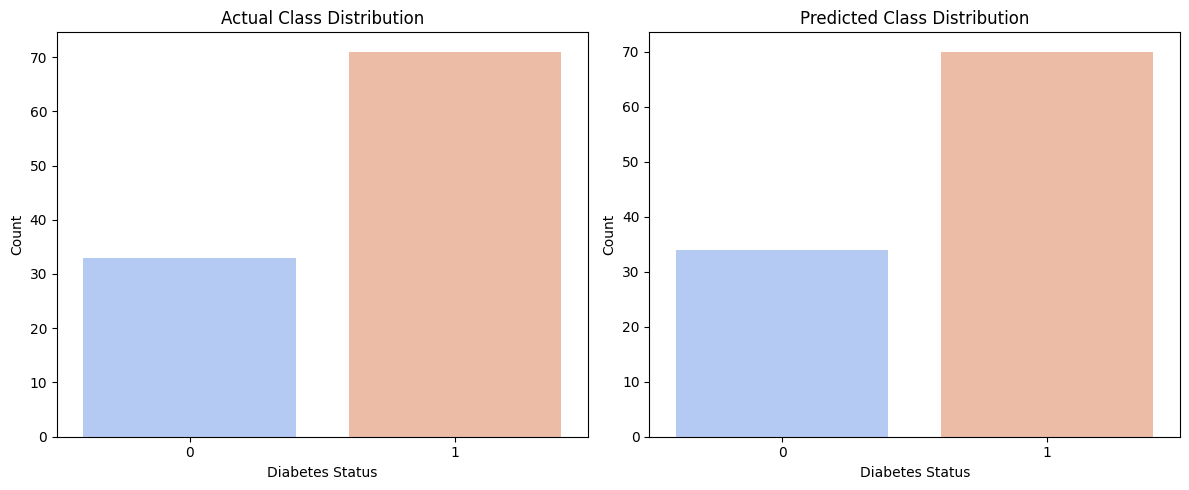

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Original class distribution
sns.countplot(x=y_test, palette='coolwarm', ax=ax[0])
ax[0].set_title('Actual Class Distribution')
ax[0].set_xlabel('Diabetes Status')
ax[0].set_ylabel('Count')

# Predicted class distribution
sns.countplot(x=y_pred, palette='coolwarm', ax=ax[1])
ax[1].set_title('Predicted Class Distribution')
ax[1].set_xlabel('Diabetes Status')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

 Interpretation:
If the model predicts only one class (all 0s or all 1s), it means it's biased or overfitting.
If the distributions are too different, the model may be misclassifying cases.

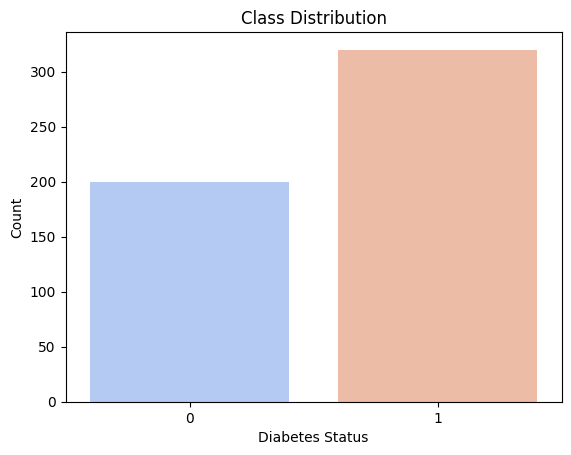

In [32]:
df['class'].value_counts(normalize=True) * 100

sns.countplot(x=df['class'], palette='coolwarm')
plt.title('Class Distribution')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.show()

## Model Evaluation: Random Forest Classifier

### 1. Confusion Matrix Interpretation

The confusion matrix helps to evaluate the performance of the Random Forest model in classifying the diabetes risk correctly.

#### **Confusion Matrix:**



- **True Negatives (TN) [33]**: The number of correctly predicted non-diabetic cases.
- **False Positives (FP) [0]**: The number of incorrect predictions where diabetes was predicted, but the patient was not diabetic.
- **False Negatives (FN) [1]**: The number of incorrect predictions where the model predicted non-diabetic, but the patient was diabetic.
- **True Positives (TP) [70]**: The number of correctly predicted diabetic cases.

#### **Key Observations:**
- The model made only **1 false negative** and no false positives.
- The accuracy rate is high, but the false negative (missed diabetic case) suggests there is room for improvement in sensitivity.

---

### 2. Classification Report Interpretation

The classification report provides a more detailed evaluation of the model, showing the precision, recall, and F1-score for each class.

#### **Classification Report:**
           precision    recall  f1-score     support

- **Precision (Class 0: 0.9706, Class 1: 1.0)**: Precision measures how many of the predicted positives were actually positive. The model performs better for Class 1 (diabetic) with perfect precision.
- **Recall (Class 0: 1.0, Class 1: 0.986)**: Recall measures how many of the actual positives were correctly identified. The recall is high for Class 0 (non-diabetic), but Class 1 (diabetic) has slightly lower recall due to the one false negative.
- **F1-Score (Class 0: 0.9851, Class 1: 0.9929)**: The harmonic mean of precision and recall. The F1-score is also very high, showing good balance between precision and recall.
- **Accuracy**: The model achieved an overall accuracy of **99.04%**, which indicates it correctly predicted most of the test cases.

---

### 3. Metrics Summary Interpretation

The metrics summary shows the overall performance of the model in a tabular format.

#### **Metrics Summary:**
| Metric   | Value    |
|----------|----------|
| Accuracy | 0.990385 |

The **accuracy** of **99.04%** reflects that the model performed excellently, with a few room for improvement in detecting all positive cases (diabetic patients).

---

### Conclusion
The Random Forest model provides high accuracy and performs well in classifying diabetic and non-diabetic patients. The key areas to improve include minimizing false negatives to ensure better recall for Class 1 (diabetic patients). These metrics show that the model is quite reliable, but additional tuning or more data could further improve its performance.
